CHURN ANALYSIS

### Import Libraries

In [1]:
import os 
import math 
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import scipy as sp 
import seaborn as sns
import time
from datetime import datetime
from collections import Counter
from subprocess import check_output

### Read Data

In [2]:
os.chdir('E:\\Monisha\\Churn\\data')

In [3]:
train = pd.read_csv("train.csv", dtype = {'is_churn': 'int8'})
train.info()
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992931 entries, 0 to 992930
Data columns (total 2 columns):
msno        992931 non-null object
is_churn    992931 non-null int8
dtypes: int8(1), object(1)
memory usage: 8.5+ MB


,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [4]:
test = pd.read_csv("sample_submission_zero.csv", dtype = {'is_churn': 'int8'})
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
msno        970960 non-null object
is_churn    970960 non-null int8
dtypes: int8(1), object(1)
memory usage: 8.3+ MB


In [81]:
test.head(5)

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,0


[1 0]
6.39228707735


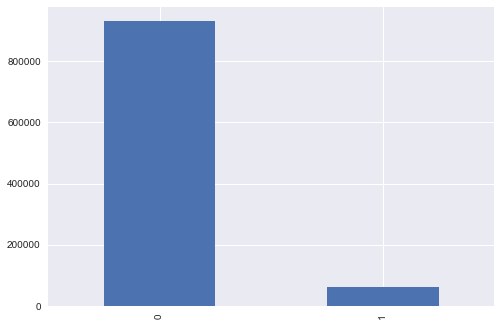

In [5]:
print(train['is_churn'].unique())                          ##Unique values in the column
no_of_churners = train['is_churn'].sum()                   ##Total number of people who churned
total_users = train['is_churn'].count()                    ## Total user base
perc_churners = (no_of_churners/total_users)*100           ## % of user base that churned
print(perc_churners)

train['is_churn'].value_counts().plot(kind = 'bar')       ##PLot pf active subscribers versus churned users


In [6]:
userlogs = pd.read_csv("user_logs.csv", nrows = 3000000)
userlogs_2 = pd.read_csv("user_logs_v2.csv",nrows= 3000000)
userlogs = userlogs.append(userlogs_2, ignore_index = True)
userlogs.info()
del userlogs_2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 9 columns):
msno          object
date          int64
num_25        int64
num_50        int64
num_75        int64
num_985       int64
num_100       int64
num_unq       int64
total_secs    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 412.0+ MB


In [7]:
userlogs.head(10)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150513,0,0,0,0,1,1,280.335
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150709,9,1,0,0,7,11,1658.948
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150105,3,3,0,0,68,36,17364.956
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150306,1,0,1,1,97,27,24667.317
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150501,3,0,0,0,38,38,9649.029
5,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150702,4,0,1,1,33,10,10021.520
6,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150830,3,1,0,0,4,7,1119.555
7,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20151107,1,0,0,0,4,5,938.022
8,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20160110,2,0,1,0,11,6,3004.068
9,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20160316,9,3,4,1,67,50,18257.661


In [8]:
members = pd.read_csv("members_v3.csv")
members.info()
members.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [9]:
transactions = pd.read_csv("transactions.csv",nrows = 1000000)
transactions_2 = pd.read_csv("transactions_v2.csv",nrows = 1000000)
transactions = transactions.append(transactions_2, ignore_index = True)
del transactions_2

In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 9 columns):
msno                      object
payment_method_id         int64
payment_plan_days         int64
plan_list_price           int64
actual_amount_paid        int64
is_auto_renew             int64
transaction_date          int64
membership_expire_date    int64
is_cancel                 int64
dtypes: int64(8), object(1)
memory usage: 137.3+ MB


### Missing values treatment

In [11]:
members.isnull().sum()/len(members)*100                         ##% of missing values in members

msno                       0.000000
city                       0.000000
bd                         0.000000
gender                    65.433528
registered_via             0.000000
registration_init_time     0.000000
dtype: float64

In [12]:
## There are no missing values except in gender at 65%.The missing values were replaced with "Others"
members['gender'] = members['gender'].fillna("others")

In [13]:
members['gender'].unique()

array(['others', 'female', 'male'], dtype=object)

In [14]:
transactions.isnull().sum()/len(transactions)*100               ##% of missing values in transactions

msno                      0.0
payment_method_id         0.0
payment_plan_days         0.0
plan_list_price           0.0
actual_amount_paid        0.0
is_auto_renew             0.0
transaction_date          0.0
membership_expire_date    0.0
is_cancel                 0.0
dtype: float64

In [17]:
train.isnull().sum()/len(train)*100

msno        0.0
is_churn    0.0
dtype: float64

In [18]:
test.isnull().sum()/len(test)*100

msno        0.0
is_churn    0.0
dtype: float64

In [19]:
userlogs.isnull().sum()/len(userlogs)*100

msno          0.0
date          0.0
num_25        0.0
num_50        0.0
num_75        0.0
num_985       0.0
num_100       0.0
num_unq       0.0
total_secs    0.0
dtype: float64

### Outlier treatment 

In [20]:
transactions.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,2.297876e+07,2.297876e+07,2.297876e+07,2.297876e+07,2.297876e+07,2.297876e+07,2.297876e+07,2.297876e+07
mean,3.886991e+01,3.349869e+01,1.487220e+02,1.506641e+02,8.478146e-01,2.015828e+07,2.015940e+07,3.881777e-02
std,3.624149e+00,3.985553e+01,1.704513e+02,1.714614e+02,3.592005e-01,6.627848e+03,8.128208e+03,1.931604e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,1.970010e+07,0.000000e+00
25%,3.800000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.015092e+07,2.015110e+07,0.000000e+00
50%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016041e+07,2.016053e+07,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016102e+07,2.016113e+07,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017033e+07,2.036102e+07,1.000000e+00


In [21]:
userlogs.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.939636e+07,1.939636e+07,1.939636e+07,1.939636e+07,1.939636e+07,1.939636e+07,1.939636e+07,1.939636e+07
mean,2.016965e+07,6.208020e+00,1.515845e+00,9.453519e-01,1.082527e+00,3.030376e+01,2.909100e+01,-8.369164e+10
std,3.187411e+03,1.345301e+01,3.927155e+00,1.939008e+00,3.495858e+00,4.199920e+01,3.228146e+01,2.778331e+13
min,2.015010e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-9.223372e+15
25%,2.017031e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.956471e+03
50%,2.017032e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.800000e+01,4.585102e+03
75%,2.017032e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.700000e+01,3.800000e+01,9.868604e+03
max,2.017033e+07,5.639000e+03,9.120000e+02,5.080000e+02,1.561000e+03,4.110700e+04,4.925000e+03,1.747677e+07


In [22]:
members.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [23]:
## Birthday has a lot of outliers; Hence deleting the column
members = members.drop('bd', axis = 1)

In [24]:
members.head(5)

,msno,city,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,others,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,others,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,others,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,others,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,female,9,20110915


### Creating Analytical Dataset

Have to create a user(msno) level dataset. Therefore the userlogs dataset has to be rolled up to user level from its current user X date level

In [14]:
userlogs['DateTime'] = pd.to_datetime(userlogs['date'], format='%Y%m%d')

In [15]:
userlogs.head(5)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,DateTime
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150513,0,0,0,0,1,1,280.335,2015-05-13
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150709,9,1,0,0,7,11,1658.948,2015-07-09
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150105,3,3,0,0,68,36,17364.956,2015-01-05
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150306,1,0,1,1,97,27,24667.317,2015-03-06
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150501,3,0,0,0,38,38,9649.029,2015-05-01


In [16]:
userlogs['Rank'] = userlogs.groupby(['msno'])['DateTime'].rank(ascending=True)
userlogs['Rank2'] = userlogs['Rank']+1
userlogs2 = userlogs.merge(userlogs, left_on = ['msno', 'Rank'], right_on = ['msno', 'Rank2'], how = 'left')

In [17]:
userlogs2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 23 columns):
msno            object
date_x          int64
num_25_x        int64
num_50_x        int64
num_75_x        int64
num_985_x       int64
num_100_x       int64
num_unq_x       int64
total_secs_x    float64
DateTime_x      datetime64[ns]
Rank_x          float64
Rank2_x         float64
date_y          float64
num_25_y        float64
num_50_y        float64
num_75_y        float64
num_985_y       float64
num_100_y       float64
num_unq_y       float64
total_secs_y    float64
DateTime_y      datetime64[ns]
Rank_y          float64
Rank2_y         float64
dtypes: datetime64[ns](2), float64(13), int64(7), object(1)
memory usage: 1.8+ GB


In [18]:
userlogs2['TimeBetweenLogins']= userlogs2['DateTime_x'] - userlogs2['DateTime_y']

In [26]:
userlogs2 = userlogs2[userlogs2['TimeBetweenLogins'].notnull()]

In [30]:
result = userlogs2.groupby('msno')['TimeBetweenLogins'].agg(['sum', 'count'])
result['AvgDaysBetweenLogins'] = result['sum']/result['count']
result.reset_index()

In [52]:
result.head(5)

,s_u_m,c_o_u_n_t,A_v_g_D_a_y_s_B_e_t_w_e_e_n_L_o_g_i_n_s
msno,,,
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,23 days,5,4 days 14:24:00
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,27 days,8,3 days 09:00:00
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,731 days,17,43 days 00:00:00
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,17 days,5,3 days 09:36:00
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,11 days,1,11 days 00:00:00


In [54]:
result = result.reset_index()

In [55]:
list(result.columns.values)

['msno', 's_u_m', 'c_o_u_n_t', 'A_v_g_D_a_y_s_B_e_t_w_e_e_n_L_o_g_i_n_s']

In [32]:
del userlogs2

In [33]:
userlogs['no_of_day']=1

In [34]:
userlogs = userlogs.groupby('msno').agg({'num_25': [np.sum,np.mean], 'num_50': [np.sum, np.mean],'num_75':[np.sum,np.mean],'num_985':[np.sum,np.mean],'num_100':[np.sum,np.mean],'num_unq':[np.sum,np.mean],'total_secs':[np.sum,np.mean],'no_of_day':[np.sum],'DateTime':[np.max]}) 

In [35]:
userlogs.columns = ["_".join(x) for x in userlogs.columns.ravel()]

In [36]:
userlogs.head(3)

,num_25_sum,num_25_mean,num_50_sum,num_50_mean,num_75_sum,num_75_mean,num_985_sum,num_985_mean,num_100_sum,num_100_mean,num_unq_sum,num_unq_mean,total_secs_sum,total_secs_mean,no_of_day_sum,DateTime_amax
msno,,,,,,,,,,,,,,,,
+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,1,1.0,0,0.0,1,1.000000,1,1.000000,10,10.0,10,10.000000,2998.267,2998.267000,1,2016-09-10
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,15,2.5,3,0.5,2,0.333333,1,0.166667,60,10.0,73,12.166667,15440.348,2573.391333,6,2017-03-31
+++dz9ZCWE2HB/47pJU82NJXQzQuZDx1Wm50YSk/kKk=,3,3.0,0,0.0,0,0.000000,1,1.000000,65,65.0,54,54.000000,17132.904,17132.904000,1,2016-03-01


In [37]:
userlogs['secs_per_song'] = userlogs['total_secs_sum'].div(userlogs['num_25_sum'] + userlogs['num_50_sum'] + userlogs['num_75_sum'] + userlogs['num_985_sum'] + userlogs['num_100_sum'])

In [38]:
userlogs.head(3)

,num_25_sum,num_25_mean,num_50_sum,num_50_mean,num_75_sum,num_75_mean,num_985_sum,num_985_mean,num_100_sum,num_100_mean,num_unq_sum,num_unq_mean,total_secs_sum,total_secs_mean,no_of_day_sum,DateTime_amax,secs_per_song
msno,,,,,,,,,,,,,,,,,
+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,1,1.0,0,0.0,1,1.000000,1,1.000000,10,10.0,10,10.000000,2998.267,2998.267000,1,2016-09-10,230.635923
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,15,2.5,3,0.5,2,0.333333,1,0.166667,60,10.0,73,12.166667,15440.348,2573.391333,6,2017-03-31,190.621580
+++dz9ZCWE2HB/47pJU82NJXQzQuZDx1Wm50YSk/kKk=,3,3.0,0,0.0,0,0.000000,1,1.000000,65,65.0,54,54.000000,17132.904,17132.904000,1,2016-03-01,248.302957


In [72]:
userlogs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1443096 entries, +++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY= to zzztsqkufVj9DPVJDM3FxDkhlbCL5z4aiYxgPSGkIK4=
Data columns (total 17 columns):
num_25_sum         1443096 non-null int64
num_25_mean        1443096 non-null float64
num_50_sum         1443096 non-null int64
num_50_mean        1443096 non-null float64
num_75_sum         1443096 non-null int64
num_75_mean        1443096 non-null float64
num_985_sum        1443096 non-null int64
num_985_mean       1443096 non-null float64
num_100_sum        1443096 non-null int64
num_100_mean       1443096 non-null float64
num_unq_sum        1443096 non-null int64
num_unq_mean       1443096 non-null float64
total_secs_sum     1443096 non-null float64
total_secs_mean    1443096 non-null float64
no_of_day_sum      1443096 non-null int64
DateTime_amax      1443096 non-null datetime64[ns]
secs_per_song      1443096 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(7)
memory usage: 198.2+ MB

In [59]:
userlogs_final = userlogs.merge(result, right_on='msno', left_index=True, how='left')

In [64]:
userlogs_final.head(5)

,num_25_sum,num_25_mean,num_50_sum,num_50_mean,num_75_sum,num_75_mean,num_985_sum,num_985_mean,num_100_sum,num_100_mean,num_unq_sum,num_unq_mean,total_secs_sum,total_secs_mean,no_of_day_sum,DateTime_amax,secs_per_song,msno,AvgDaysBetweenLogins
1101583,1,1.000000,0,0.000000,1,1.000000,1,1.000000,10,10.000000,10,10.000000,2998.267,2998.267000,1,2016-09-10,230.635923,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,NaT
0,15,2.500000,3,0.500000,2,0.333333,1,0.166667,60,10.000000,73,12.166667,15440.348,2573.391333,6,2017-03-31,190.621580,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,4 days 14:24:00
1101583,3,3.000000,0,0.000000,0,0.000000,1,1.000000,65,65.000000,54,54.000000,17132.904,17132.904000,1,2016-03-01,248.302957,+++dz9ZCWE2HB/47pJU82NJXQzQuZDx1Wm50YSk/kKk=,NaT
1,58,6.444444,18,2.000000,9,1.000000,36,4.000000,185,20.555556,258,28.666667,54253.523,6028.169222,9,2017-03-30,177.299095,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,3 days 09:00:00
2,25,1.388889,16,0.888889,9,0.500000,13,0.722222,308,17.111111,292,16.222222,82724.345,4595.796944,18,2017-03-31,222.976671,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43 days 00:00:00


In [63]:
userlogs_final = userlogs_final.drop(['sum','count'],axis=1)

In [65]:
userlogs_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443096 entries, 1101583 to 1101583
Data columns (total 19 columns):
num_25_sum              1443096 non-null int64
num_25_mean             1443096 non-null float64
num_50_sum              1443096 non-null int64
num_50_mean             1443096 non-null float64
num_75_sum              1443096 non-null int64
num_75_mean             1443096 non-null float64
num_985_sum             1443096 non-null int64
num_985_mean            1443096 non-null float64
num_100_sum             1443096 non-null int64
num_100_mean            1443096 non-null float64
num_unq_sum             1443096 non-null int64
num_unq_mean            1443096 non-null float64
total_secs_sum          1443096 non-null float64
total_secs_mean         1443096 non-null float64
no_of_day_sum           1443096 non-null int64
DateTime_amax           1443096 non-null datetime64[ns]
secs_per_song           1443096 non-null float64
msno                    1443096 non-null object
AvgDays

In [73]:
userlogs_final['AvgBetweenLogins']= userlogs_final['AvgDaysBetweenLogins'].dt.days

In [74]:
userlogs_final.head(5)

,num_25_sum,num_25_mean,num_50_sum,num_50_mean,num_75_sum,num_75_mean,num_985_sum,num_985_mean,num_100_sum,num_100_mean,num_unq_sum,num_unq_mean,total_secs_sum,total_secs_mean,no_of_day_sum,DateTime_amax,secs_per_song,msno,AvgDaysBetweenLogins,AvgBetweenLogins
1101583,1,1.000000,0,0.000000,1,1.000000,1,1.000000,10,10.000000,10,10.000000,2998.267,2998.267000,1,2016-09-10,230.635923,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,NaT,NaN
0,15,2.500000,3,0.500000,2,0.333333,1,0.166667,60,10.000000,73,12.166667,15440.348,2573.391333,6,2017-03-31,190.621580,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,4 days 14:24:00,4.0
1101583,3,3.000000,0,0.000000,0,0.000000,1,1.000000,65,65.000000,54,54.000000,17132.904,17132.904000,1,2016-03-01,248.302957,+++dz9ZCWE2HB/47pJU82NJXQzQuZDx1Wm50YSk/kKk=,NaT,NaN
1,58,6.444444,18,2.000000,9,1.000000,36,4.000000,185,20.555556,258,28.666667,54253.523,6028.169222,9,2017-03-30,177.299095,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,3 days 09:00:00,3.0
2,25,1.388889,16,0.888889,9,0.500000,13,0.722222,308,17.111111,292,16.222222,82724.345,4595.796944,18,2017-03-31,222.976671,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43 days 00:00:00,43.0


In [75]:
userlogs_final = userlogs_final.drop('AvgDaysBetweenLogins',axis = 1)

In [77]:
userlogs_final['AvgBetweenLogins'].fillna(0 , inplace = True)

In [80]:
del result